# Non linear problem (geo location)

In [2]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split

In [3]:
sklearn.__version__

'0.22.1'

In [4]:
df = pd.read_csv('geoloc_elev.csv')
df.head()

,lat,lon,elev,source,target
0,0.106264,0.068264,0.542477,S,1
1,0.099569,0.132094,0.722289,C,1
2,-0.775751,-0.814161,0.214760,S,0
3,-0.159833,0.040773,0.478576,S,1
4,-0.096395,0.021420,0.270322,C,1


In [5]:
X = df[['lat', 'lon']].values
y = df['target'].values

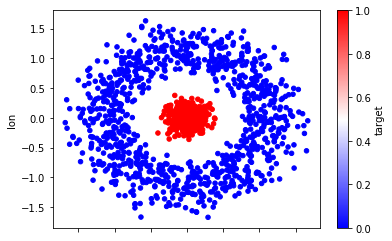

In [6]:
df.plot(kind='scatter',
        x='lat',
        y='lon', 
        c='target',
        cmap='bwr');

In [7]:
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

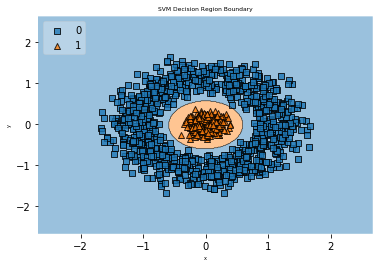

In [9]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)

plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title('SVM Decision Region Boundary', size=6)
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3, 
                                                   random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

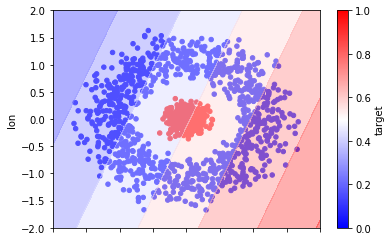

In [12]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = lr.predict_proba(ab)[:, 1]
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

In [16]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(tf.keras.optimizers.SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
result = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

C:\Users\Dell\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 945 samples, validate on 105 samples
Epoch 1/20
945/945 [==============================] - 2s 2ms/sample - loss: 0.6504 - acc: 0.6339 - val_loss: 0.6468 - val_acc: 0.6381
Epoch 2/20
945/945 [==============================] - 0s 99us/sample - loss: 0.6268 - acc: 0.6497 - val_loss: 0.6304 - val_acc: 0.6381
Epoch 3/20
945/945 [==============================] - 0s 99us/sample - loss: 0.6053 - acc: 0.6582 - val_loss: 0.5966 - val_acc: 0.6381
Epoch 4/20
945/945 [==============================] - 0s 116us/sample - loss: 0.5839 - acc: 0.6360 - val_loss: 0.5819 - val_acc: 0.6381
Epoch 5/20
945/945 [==============================] - 0s 99us/sample - loss: 0.5682 - acc: 0.6582 - val_loss: 0.5653 - val_acc: 0.6381
Epoch 6/20
945/945 [==============================] - 0s 99us/sample - loss: 0.5574 - acc: 0.6275 - val_

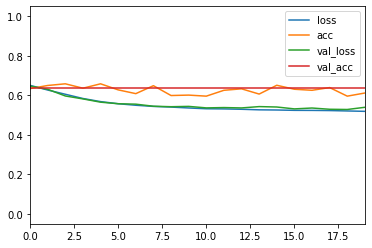

In [17]:
pd.DataFrame(result.history).plot(ylim=(-0.05, 1.05))

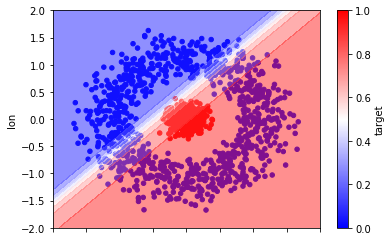

In [18]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict_proba(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_dim=2, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(tf.keras.optimizers.SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
h = model.fit(X_train, y_train, epochs=20, validation_split=0.01)

Train on 1039 samples, validate on 11 samples
Epoch 1/20
1039/1039 [==============================] - 1s 1ms/sample - loss: 0.6174 - acc: 0.6083 - val_loss: 0.6149 - val_acc: 0.5455
Epoch 2/20
1039/1039 [==============================] - 0s 105us/sample - loss: 0.5024 - acc: 0.7507 - val_loss: 0.4925 - val_acc: 0.8182
Epoch 3/20
1039/1039 [==============================] - 0s 90us/sample - loss: 0.4100 - acc: 0.8980 - val_loss: 0.4545 - val_acc: 0.7273
Epoch 4/20
1039/1039 [==============================] - 0s 75us/sample - loss: 0.3480 - acc: 0.8912 - val_loss: 0.3234 - val_acc: 0.9091
Epoch 5/20
1039/1039 [==============================] - 0s 90us/sample - loss: 0.2722 - acc: 0.9509 - val_loss: 0.2451 - val_acc: 1.0000
Epoch 6/20
1039/1039 [==============================] - 0s 90us/sample - loss: 0.1800 - acc: 0.9971 - val_loss: 0.1671 - val_acc: 1.0000
Epoch 7/20
1039/1039 [==============================] - 0s 90us/sample - loss: 0.1257 - acc: 0.9990 - val_loss: 0.1221 - val_acc: 1.

In [20]:
from sklearn.metrics import confusion_matrix, classification_report 

y_pred = model.predict_classes(X_test)

In [21]:
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm,
            index=["Miss", "Hit"],
            columns=["Pred_Miss", "Pred_Hit"])

,Pred_Miss,Pred_Hit
Miss,311,0
Hit,0,139


In [22]:
train_score = model.evaluate(X_train, y_train, verbose=0)[1]
test_score = model.evaluate(X_test, y_test, verbose=0)[1]

print("""Accuracy Scores:
    Train:\t{:0.3}
    Test:\t{:0.3}""".format(train_score, test_score))

Accuracy Scores:
    Train:	1.0
    Test:	1.0


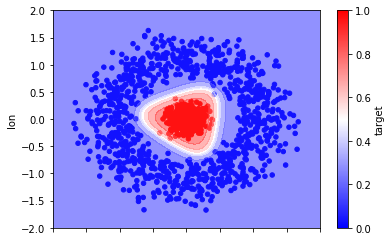

In [23]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

***